<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Tokenization" data-toc-modified-id="Tokenization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tokenization</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#With-pretrained-model" data-toc-modified-id="With-pretrained-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>With pretrained model</a></span></li><li><span><a href="#inp-and-outp-of-distilbert" data-toc-modified-id="inp-and-outp-of-distilbert-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>inp and outp of distilbert</a></span></li><li><span><a href="#Using-sklearn" data-toc-modified-id="Using-sklearn-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Using sklearn</a></span></li><li><span><a href="#Finetuning-the-transformer-model" data-toc-modified-id="Finetuning-the-transformer-model-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Finetuning the transformer model</a></span></li></ul></li><li><span><a href="#Error-analysis" data-toc-modified-id="Error-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Error analysis</a></span></li></ul></div>

# Load data

In [1]:
from datasets import list_datasets
from datasets import load_dataset

In [2]:
emotions = load_dataset("emotion")

Using custom data configuration default


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /home/quan/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [3]:
train_ds = emotions["train"]
train_ds.column_names

['text', 'label']

In [4]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [8]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [9]:
train_ds['text'][:5],train_ds['label'][:5]

(['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 [0, 0, 3, 2, 3])

In [10]:
emotions.reset_format()

# Tokenization

In [15]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [16]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [29]:
# emotions['train']['text']

In [20]:
tokenize(emotions["train"][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

the attention mask allows the model to ignore the padded parts of the input

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098136789/files/assets/nlpt_0203.png)

In [21]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

`batch_size=None` => tokenize() function will be applied on the full dataset as a single batch

In [22]:
type(emotions_encoded)

datasets.dataset_dict.DatasetDict

In [24]:
emotions_encoded.column_names

{'train': ['text', 'label', 'input_ids', 'attention_mask'],
 'validation': ['text', 'label', 'input_ids', 'attention_mask'],
 'test': ['text', 'label', 'input_ids', 'attention_mask']}

# Training

## With pretrained model

In [ ]:
from transformers import AutoModel
import torch

In [26]:
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [27]:
device

device(type='cuda')

## inp and outp of distilbert

In [30]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
tokenizer

PreTrainedTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [47]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
inputs
# print(f"Input tensor shape: {inputs['input_ids'].size()}")

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [50]:
tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

['[CLS]', 'this', 'is', 'a', 'test', '[SEP]']

In [51]:
inputs = {k:v.to(device) for k,v in inputs.items()}
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]], device='cuda:0'),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [52]:
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1564, -0.1863,  0.0527,  ..., -0.1188,  0.0663,  0.5470],
         [-0.3571, -0.6483, -0.0619,  ..., -0.3039,  0.3506,  0.5221],
         [-0.2766, -0.4459,  0.1817,  ..., -0.0947, -0.0076,  0.9956],
         [-0.2835, -0.3919,  0.3749,  ..., -0.2149, -0.1172,  1.0523],
         [ 0.2663, -0.5092, -0.3182,  ..., -0.4204,  0.0146, -0.2148],
         [ 0.9438,  0.0112, -0.4718,  ...,  0.1438, -0.7285, -0.1616]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [53]:
outputs.last_hidden_state.shape

torch.Size([1, 6, 768])

In [54]:
# for classification, we only need the [cls] (the first) token
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    
    # "hidden_state": the new transformer datasetdict will have
    # an extra column called 'hidden_state'
    # also, must return a numpy array/python object for datasetdict
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [55]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

Loading cached processed dataset at /home/quan/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705/cache-4bbd39110f9d32c1.arrow
Loading cached processed dataset at /home/quan/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705/cache-685a2d7c21f54be0.arrow


In [56]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [57]:
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])

In [59]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)
emotions_hidden

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

## Using sklearn

In [60]:
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [69]:
labels = emotions["train"].features["label"].names

In [67]:
from sklearn.linear_model import LogisticRegression

# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6335

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

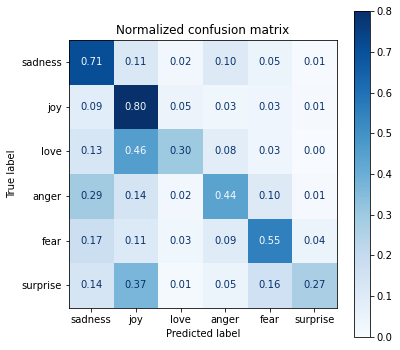

In [77]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax)#, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

## Finetuning the transformer model

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098136789/files/assets/nlpt_0204.png)

In [78]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'pre_classifi

Define metric

In [84]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    # pred: EvalPrediction object 
    # (which is a named tuple with predictions and label_ids attributes)
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [85]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /home/quan/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [88]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"book-{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False, # change to True to push
                                  log_level="error")

In [91]:
??TrainingArguments

In [89]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

/home/quan/anaconda3/envs/fastai_v2/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ········


wandb: Appending key for api.wandb.ai to your netrc file: /home/quan/.netrc
wandb: wandb version 0.12.18 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


/home/quan/anaconda3/envs/fastai_v2/lib/python3.8/site-packages/torch/nn/modules/module.py:998: UserWarning: Using non-full backward hooks on a Module that does not return a single Tensor or a tuple of Tensors is deprecated and will be removed in future versions. This hook will be missing some of the grad_output. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using non-full backward hooks on a Module that does not return a "
/home/quan/anaconda3/envs/fastai_v2/lib/python3.8/site-packages/torch/nn/modules/module.py:1033: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.840300,0.318711,0.903000,0.899029
2,0.254500,0.212289,0.925500,0.925461


In [92]:
emotions_encoded["validation"]

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 2000
})

In [93]:
preds_output = trainer.predict(emotions_encoded["validation"])


In [95]:
preds_output

PredictionOutput(predictions=array([[ 4.5409317 , -0.53661627, -0.9042765 , -0.9765183 , -0.8210363 ,
        -1.6817988 ],
       [ 4.4842086 , -0.8858118 , -1.6367726 , -0.75610346, -0.40499783,
        -1.4950242 ],
       [-1.1098686 ,  1.9159793 ,  2.877005  , -1.2220756 , -1.449962  ,
        -1.4602252 ],
       ...,
       [-1.1577673 ,  4.5961766 ,  0.13668327, -1.7854556 , -1.566211  ,
        -1.3388703 ],
       [-1.9005023 ,  2.6754162 ,  2.5639987 , -1.6610188 , -1.6274052 ,
        -1.0630623 ],
       [-1.4439131 ,  4.261368  ,  0.07836381, -2.0835125 , -1.4989828 ,
        -0.5468557 ]], dtype=float32), label_ids=array([0, 0, 2, ..., 1, 1, 1]), metrics={'test_loss': 0.21228869259357452, 'test_accuracy': 0.9255, 'test_f1': 0.9254614643791592, 'test_runtime': 1.0063, 'test_samples_per_second': 1987.415, 'test_steps_per_second': 31.799})

In [94]:
preds_output.metrics

{'test_loss': 0.21228869259357452,
 'test_accuracy': 0.9255,
 'test_f1': 0.9254614643791592,
 'test_runtime': 1.0063,
 'test_samples_per_second': 1987.415,
 'test_steps_per_second': 31.799}

# Error analysis

 sort the validation samples by the model loss.

In [96]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [102]:
from torch.nn.functional import cross_entropy

def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")
    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

In [98]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [99]:
# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/125 [00:00<?, ?ba/s]

In [100]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'loss', 'predicted_label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [103]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

Let’s first have a look at the data samples with the highest losses:

In [106]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1500,i guess we would naturally feel a sense of lon...,anger,sadness,5.657405
882,i feel badly about reneging on my commitment t...,love,sadness,5.541623
1963,i called myself pro life and voted for perry w...,joy,sadness,5.031645
1870,i guess i feel betrayed because i admired him ...,joy,sadness,4.815699
1274,i am going to several holiday parties and i ca...,joy,sadness,4.654367
1509,i guess this is a memoir so it feels like that...,joy,fear,4.485466
1111,im lazy my characters fall into categories of ...,joy,fear,4.427432
1801,i feel that he was being overshadowed by the s...,love,sadness,4.156771
1590,deception from a person i loved very much,anger,love,4.131822
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.118482


- Wrong labels

    Every process that adds labels to data can be flawed. Annotators can make mistakes or disagree, while labels that are inferred from other features can be wrong. If it was easy to automatically annotate data, then we would not need a model to do it. Thus, it is normal that there are some wrongly labeled examples. With this approach, we can quickly find and correct them.
    

- Quirks of the dataset

    Datasets in the real world are always a bit messy. When working with text, special characters or strings in the inputs can have a big impact on the model’s predictions. Inspecting the model’s weakest predictions can help identify such features, and cleaning the data or injecting similar examples can make the model more robust.

- Smallest loss examples

    Deep learning models are exceptionally good at finding and exploiting shortcuts to get to a prediction. For this reason, it is also worth investing time into looking at the examples that the model is most confident about, so that we can be confident that the model does not improperly exploit certain features of the text. So, let’s also look at the predictions with the smallest loss: